In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [38]:
#set the dataset path
data_dir = "D:/NM_PROJECT/tea sickness ds"

In [39]:
#set image size batch size for pre processing
img_height,img_width=180,180
batch_size=32

In [40]:
#devide dataset for trainig 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [41]:
#devide dataset for validation 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [42]:
#get the class names from dataset
class_names = train_ds.class_names
print(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [43]:
#our dataset have 7 classes
num_classes = 8

In [44]:
#set the image scale and size for model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [45]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
#fit the model
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
23/23 [==============================] - 15s 526ms/step - loss: 2.0258 - accuracy: 0.2910 - val_loss: 1.3953 - val_accuracy: 0.3390
Epoch 2/20
23/23 [==============================] - 13s 501ms/step - loss: 1.1107 - accuracy: 0.5367 - val_loss: 1.2533 - val_accuracy: 0.4746
Epoch 3/20
23/23 [==============================] - 13s 502ms/step - loss: 0.9006 - accuracy: 0.6314 - val_loss: 1.0166 - val_accuracy: 0.5537
Epoch 4/20
23/23 [==============================] - 13s 496ms/step - loss: 0.6676 - accuracy: 0.7500 - val_loss: 0.9252 - val_accuracy: 0.6271
Epoch 5/20
23/23 [==============================] - 13s 496ms/step - loss: 0.5141 - accuracy: 0.8178 - val_loss: 0.9105 - val_accuracy: 0.5989
Epoch 6/20
23/23 [==============================] - 13s 497ms/step - loss: 0.4818 - accuracy: 0.8277 - val_loss: 0.8404 - val_accuracy: 0.6441
Epoch 7/20
23/23 [==============================] - 13s 493ms/step - loss: 0.2531 - accuracy: 0.9082 - val_loss: 1.0424 - val_accuracy: 0.6497

In [61]:
tf.keras.models.save_model(model,'tea.hdf5')

In [62]:
import matplotlib.pyplot as plt

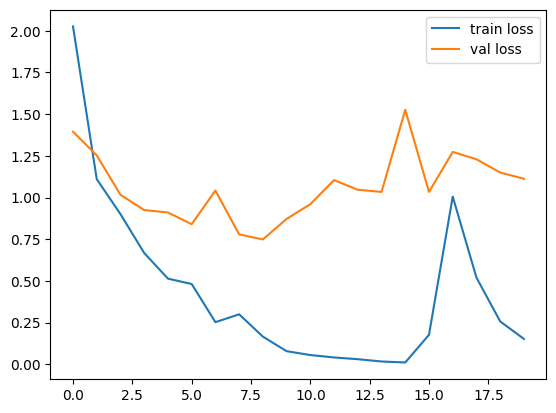

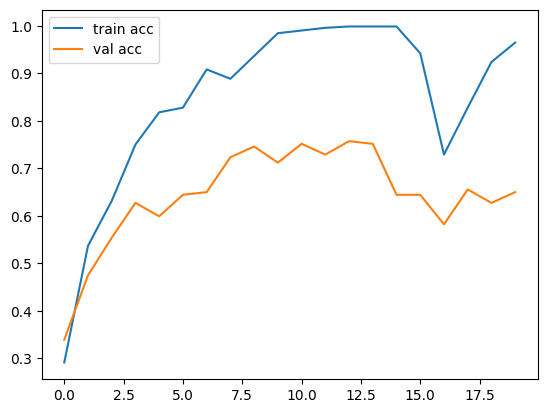

<Figure size 640x480 with 0 Axes>

In [63]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [64]:
from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

filepath = './tea.hdf5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")

Model Loaded Successfully


In [65]:
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (180,180)) # load image 

    test_image = img_to_array(test_image)#/255 # convert image to np array and normalize
    test_image = np.expand_dims(test_image, axis = 0)# change dimention 3D to 4D

    result = model.predict(test_image) # predict diseased palnt or not
    #print(result) 

    pred = np.argmax(result, axis=1)
    pred = pred[0]

    expression = ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot','white spot']

    test_image = img.imread(test_img_path)
    print(expression[pred])
    
predict('D:/NM_PROJECT/tea sickness ds/Anthracnose/IMG_20220503_143511.jpg')

1/1 [==============================] - 0s 173ms/step
Anthracnose


In [66]:
predict("D:/NM_PROJECT/tea sickness ds2/val/gray light/IMG_20220503_142039.jpg")

1/1 [==============================] - 0s 47ms/step
gray light


In [67]:
predict("D:/NM_PROJECT/tea sickness ds2/val/red leaf spot/UNADJUSTEDNONRAW_thumb_1ed.jpg")

1/1 [==============================] - 0s 40ms/step
red leaf spot
